In [2]:
import pickle
from scipy import sparse
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import spektral
import os
import tensorflow as tf
import pandas
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import keras_tuner as kt
from scipy.optimize import curve_fit
from scipy.interpolate import make_interp_spline, BSpline
import pandas as pd
import openpyxl

In [3]:
batch = pd.read_excel(r"C:\Users\buing\Documents\CBE 424\3rd informal\first trial plot.xlsx")
print(batch)

    time(s)  T_outer wall  T_inner wall  T_air  T_water    T_model  \
0      0.00          30.8          59.2   22.8     59.3  59.300000   
1     60.29          30.4          58.6   22.8     58.6  58.586998   
2    127.49          30.2          57.9   22.9     57.8  57.812765   
3    198.90          30.1          57.0   22.8     56.9  57.000142   
4    268.08          30.1          56.3   22.9     56.1  56.243064   
5    300.19          29.9          55.9   22.9     55.9  55.894570   
6    360.07          29.8          55.2   22.9     55.2  55.254384   
7    428.17          29.6          54.6   22.9     54.5  54.541400   
8    480.10          29.4          54.1   23.0     53.9  54.022826   
9    540.05          29.5          53.5   23.0     53.4  53.420201   
10   600.00          29.1          53.0   22.9     52.8  52.811456   
11   662.37          28.9          52.3   23.0     52.4  52.226689   
12   720.01          28.8          51.8   23.0     51.6  51.680625   
13   780.17         

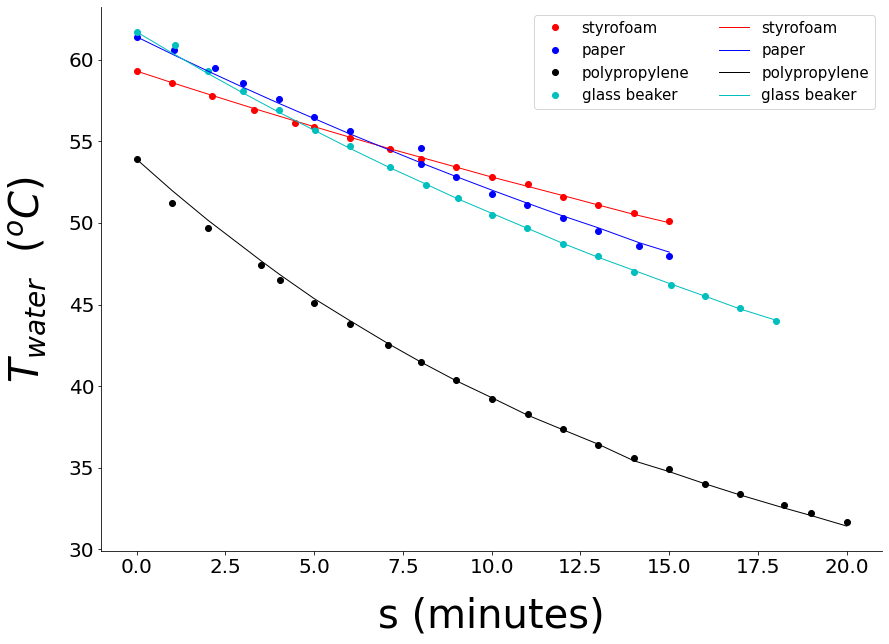

In [7]:
fig, ax1 = plt.subplots(figsize = (14, 10))
#total flux at permeate
n = 1
lw = 1
lw1 = 6
k1 = 0.026658
k2 = 0.047736
k3 = 0.0383528

ax1.plot(batch["time(s)"]/60,batch["T_water"],'ro', markersize = lw1,label = "styrofoam")
ax1.plot(batch["time(s).1"]/60,batch["T_water.1"],'bo', markersize = lw1,label = "paper")
ax1.plot(batch["time(s).2"]/60,batch["T_water.2"],'ko', markersize = lw1,label = "polypropylene")
ax1.plot(batch["time(s).3"]/60,batch["T_water.3"],'co', markersize = lw1,label = "glass beaker")

ax1.plot(batch["time(s)"]/60,batch["T_model"],'r-', linewidth = lw,label = "styrofoam")
ax1.plot(batch["time(s).1"]/60,batch["T_model.1"],'b-', linewidth = lw,label = "paper")
ax1.plot(batch["time(s).2"]/60,batch["T_model.2"],'k-', linewidth = lw,label = "polypropylene")
ax1.plot(batch["time(s).3"]/60,batch["T_model.3"],'c-', linewidth = lw,label = "glass beaker")
#ax2.plot(batch["feed flow (sccm)"],batch["N2 (ret)"],'bo', markersize = lw)


#plt.plot(t_int,f1,'r-', linewidth = 1, label = "model 1")
#plt.plot(t_int,f2,'b-',linewidth = 1,label = "model 2")
#plt.plot(t_int,f3,'g-',linewidth = 1, label = "model 3")

legend = plt.legend(ncol = 2, loc = 'best', fontsize = 15)
ax1.set_ylabel(r"$ T_{water}$  $(^oC)$", fontsize = 40,labelpad=20)
#ax2.set_ylabel(r" N2% recovery", fontsize = 20, labelpad = 20, color = 'b')
ax1.set_xlabel(r"s (minutes)",fontsize = 40,labelpad=20)
ax1.tick_params(axis='both', which='major', labelsize=20)
#ax2.tick_params(axis='both', which='major', labelsize=20)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

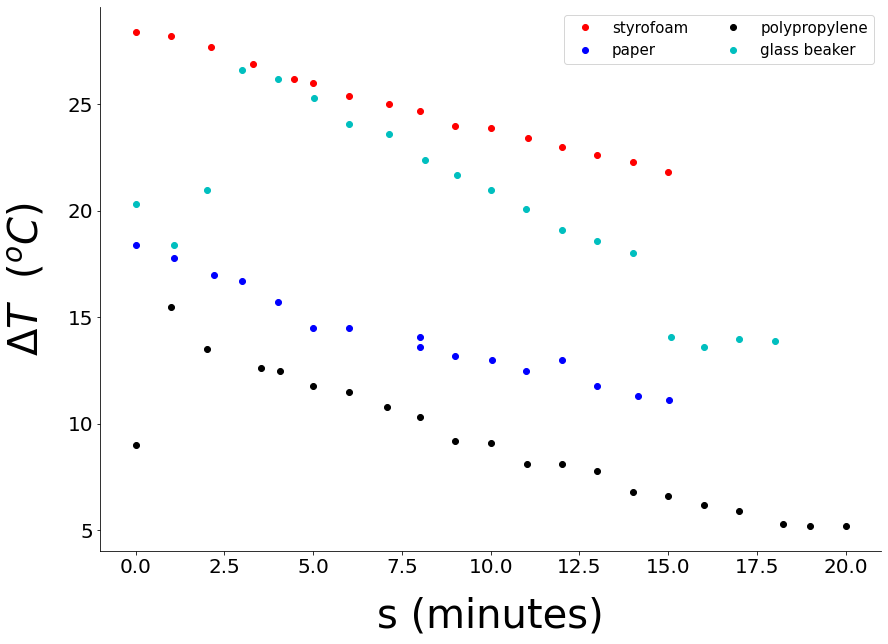

In [12]:
fig, ax1 = plt.subplots(figsize = (14, 10))
#total flux at permeate
n = 1
lw = 1
lw1 = 6
k1 = 0.026658
k2 = 0.047736
k3 = 0.0383528

ax1.plot(batch["time(s)"]/60,batch["T_inner wall"] - batch["T_outer wall"],'ro', markersize = lw1,label = "styrofoam")
ax1.plot(batch["time(s).1"]/60,batch["T_inner wall.1"] - batch["T_outer wall.1"],'bo', markersize = lw1,label = "paper")
ax1.plot(batch["time(s).2"]/60,batch["T_inner wall.2"] - batch["T_outer wall.2"],'ko', markersize = lw1,label = "polypropylene")
ax1.plot(batch["time(s).3"]/60,batch["T_inner wall.3"] - batch["T_outer wall.3"],'co', markersize = lw1,label = "glass beaker")

#ax1.plot(batch["time(s)"]/60,batch["T_model"],'r-', linewidth = lw,label = "styrofoam")
#ax1.plot(batch["time(s).1"]/60,batch["T_model.1"],'b-', linewidth = lw,label = "paper")
#ax1.plot(batch["time(s).2"]/60,batch["T_model.2"],'k-', linewidth = lw,label = "polypropylene")
#ax1.plot(batch["time(s).3"]/60,batch["T_model.3"],'c-', linewidth = lw,label = "glass beaker")
#ax2.plot(batch["feed flow (sccm)"],batch["N2 (ret)"],'bo', markersize = lw)


#plt.plot(t_int,f1,'r-', linewidth = 1, label = "model 1")
#plt.plot(t_int,f2,'b-',linewidth = 1,label = "model 2")
#plt.plot(t_int,f3,'g-',linewidth = 1, label = "model 3")

legend = plt.legend(ncol = 2, loc = 'best', fontsize = 15)
ax1.set_ylabel(r"$ \Delta T$  $(^oC)$", fontsize = 40,labelpad=20)
#ax2.set_ylabel(r" N2% recovery", fontsize = 20, labelpad = 20, color = 'b')
ax1.set_xlabel(r"s (minutes)",fontsize = 40,labelpad=20)
ax1.tick_params(axis='both', which='major', labelsize=20)
#ax2.tick_params(axis='both', which='major', labelsize=20)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')